In [9]:
import sys
import os

# Automatic search for project processing
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

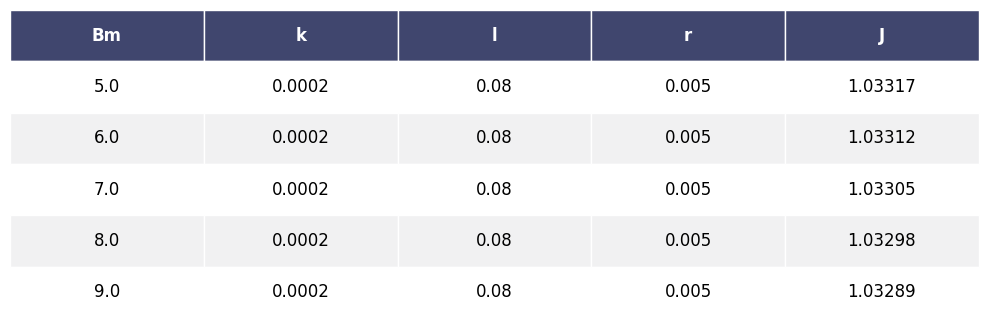

In [10]:
from src.data_preprocess.load import file_to_pd

df = file_to_pd('../data/output.csv')

from src.visualization.visualization import render_mpl_table

render_mpl_table(df.head(5))

In [11]:
from src.data_preprocess.preprocess import data_preprocess

train_loader, test_loader, scaler_X, scaler_y = data_preprocess(df, model_name='mlp')

In [12]:
from src.train.train import train_mlp
from src.models.model_factory import get_model
model = train_mlp(get_model('mlp'),train_loader=train_loader)

[Epoch 0] Loss: 0.789173
[Epoch 50] Loss: 0.073390
[Epoch 100] Loss: 0.008839
[Epoch 150] Loss: 0.060626
[Epoch 200] Loss: 0.005624
[Epoch 250] Loss: 0.007302
[Epoch 300] Loss: 0.004765
[Epoch 350] Loss: 0.006279
[Epoch 400] Loss: 0.007962
[Epoch 450] Loss: 0.026766
[Epoch 500] Loss: 0.020237
[Epoch 550] Loss: 0.008432
[Epoch 600] Loss: 0.003579
[Epoch 650] Loss: 0.004824
[Epoch 700] Loss: 0.000614
[Epoch 750] Loss: 0.001571
[Epoch 800] Loss: 0.002475
[Epoch 850] Loss: 0.003269
[Epoch 900] Loss: 0.005603
[Epoch 950] Loss: 0.012605
[Epoch 1000] Loss: 0.002390
[Epoch 1050] Loss: 0.003927
[Epoch 1100] Loss: 0.004380
[Epoch 1150] Loss: 0.003552
[Epoch 1200] Loss: 0.001247
[Epoch 1250] Loss: 0.001191
[Epoch 1300] Loss: 0.001082
[Epoch 1350] Loss: 0.002406
[Epoch 1400] Loss: 0.023680
[Epoch 1450] Loss: 0.001829
[Epoch 1500] Loss: 0.005658
[Epoch 1550] Loss: 0.001115
[Epoch 1600] Loss: 0.000727
[Epoch 1650] Loss: 0.000774
[Epoch 1700] Loss: 0.006425
[Epoch 1750] Loss: 0.004060
[Epoch 1800] Lo

In [13]:
from src.process_optimization.predict import predict_single, find_min_J

In [14]:
result = predict_single(model, [25.0, 0.0002, 0.065, 0.005], scaler_X, scaler_y)
print("J =", result)

J = 1.0308828353881836


In [15]:
bounds = [(5, 50), (100e-6, 200e-6), (0.04, 0.08), (0.003, 0.01)]

optimal_parameters, optimal_j = find_min_J(model, bounds, scaler_X, scaler_y)

print("Optimal parameters =", optimal_parameters,'\n')
print("Optimal  J =", optimal_j)

Optimal parameters = [50, 0.00010022544165498318, 0.0799997168186773, 0.009999991742980396] 

Optimal  J = 1.022822618484497


In [22]:
from src.evaluation.evaluate import evaluate_model
import torch
X_test_all, y_test_all = [], []

for X_batch, y_batch in test_loader:
    X_test_all.append(X_batch)
    y_test_all.append(y_batch)
    
X_test_np = torch.cat(X_test_all).numpy()
y_test_np = torch.cat(y_test_all).numpy()


y_pred = model.predict(X_test_np)
y_test_original = scaler_y.inverse_transform(y_test_np)
y_pred_original = scaler_y.inverse_transform(y_pred)
metrics = evaluate_model(y_true=y_test_original, y_pred=y_pred_original)

print(metrics)

{'MSE': 2.8798108786531884e-08, 'RMSE': 0.00016970005535217684, 'MAE': 9.692907042335719e-05, 'MAPE (%)': 0.009410361235495657, 'R²': 0.9952862858772278, 'Accuracy < 0.005': 100.0}
